This is the example model made for revision of the model in hands on machine learning with scikit learn.

In [8]:
import sys
assert sys.version_info >= (3,10)

In [35]:
import sys
from packaging import version

python_version = f"{sys.version_info.major}.{sys.version_info.minor}"
print(python_version)

assert version.parse(python_version) >= version.parse("3.10")

3.13


in the above code assert is like an if statement that on coming false would result in an error while on coming true will run nothing.
therefore the above statement is to check whether we have the desired version or not.the book only says 3.7 but i checked 3.10

In [40]:
from packaging import version
import sklearn

print(version.parse(sklearn.__version__))
print(type(version.parse(sklearn.__version__)))
print(sklearn.__version__)
print(type (sklearn.__version__))
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

1.6.1
<class 'packaging.version.Version'>
1.6.1
<class 'str'>


In [30]:
k = 3
j = 5
p = f"{k}.09"

In [31]:
print(type(p))
print(p)

<class 'str'>
k.09


In [48]:
u=(90,6)
print(type(u))
#print(u.major)
#major or minor is an attribute of specific classes or custom classes like version numbers etc 

<class 'tuple'>


In [50]:
o=(90,5,8)
if(o >= u):
    print("true")
else:
    print("false")

false


This is machine learning housing corporation . my job is to make a model to predict the median housing values of district given a certain number of features of the district.

In [17]:
from pathlib import Path
import pandas as pd
import urllib.request 
import tarfile

def housing_data():
    tarball_Path = Path("datasets/housing.tgz")
    if not tarball_Path.is_file():
        Path("datasets").mkdir(parents = True ,exist_ok = True)
        #the previous line is meant to make a directory called datasets setting parents equal to true means python will automatically create
        #any previous path mentioned before thus helpimg to save manual effort 
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url ,tarball_Path)
        #the last line is there to take the housing dataeset from the internet 
        with tarfile.open(tarball_Path) as tarball_Housing:
            tarball_Housing.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/Housing.csv")) 

Housing = housing_data()

Thus we created a function to automatically prepare the dataset for the model.

filter attribute is added in python 3.14to prevent malicious attacks.

In [18]:
Housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [19]:
Housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [20]:
Housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [21]:
Housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<function matplotlib.pyplot.show(close=None, block=None)>

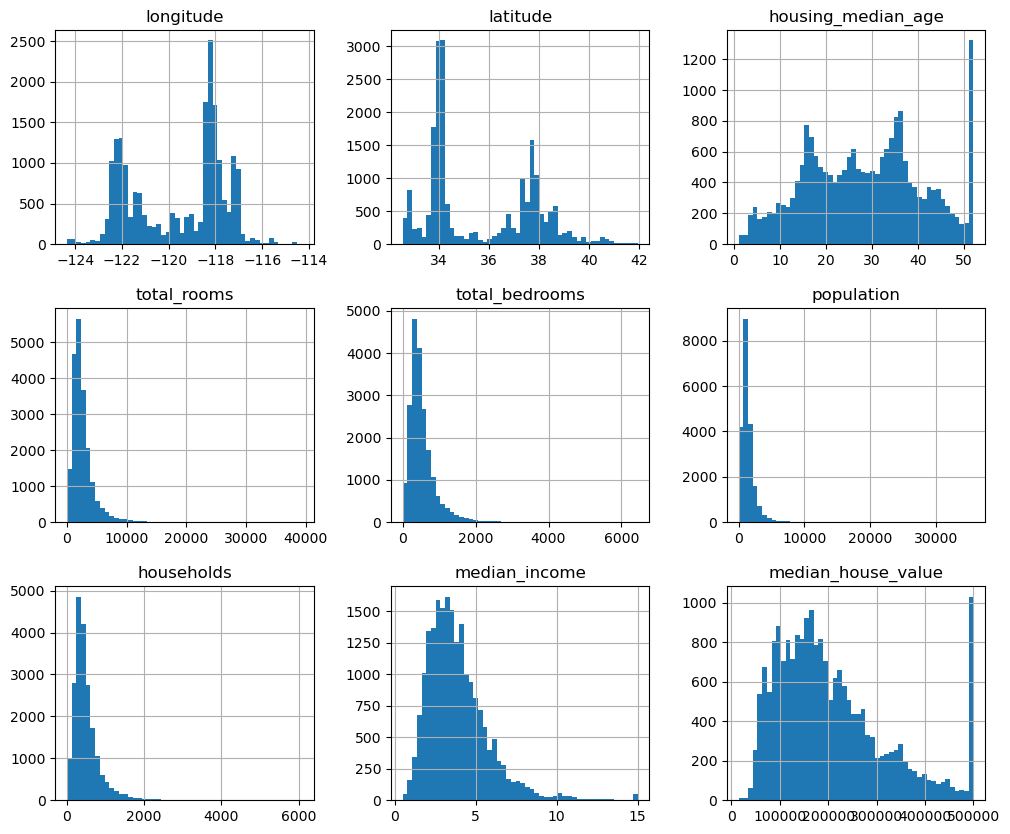

In [28]:
import matplotlib.pyplot as plt

Housing.hist(bins=50, figsize=(12 ,10))
plt.show

In [31]:
import numpy as np

def data_shuffle_splitter(data ,test_ratio):
    np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[test_indices] , data.iloc[train_indices]

#give me rows and columns by their index number

In [33]:
test_set ,training_set = data_shuffle_splitter(Housing, 0.2)
len(training_set)

16512

In [39]:
from zlib import crc32

def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio*2**32

def split_data_with_id(data ,id_column ,test_ratio):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_ ,test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [40]:
housing_with_id = Housing.reset_index()
train_set ,test_set = split_data_with_id(housing_with_id , "index" ,0.2)

In [45]:
from sklearn.model_selection import train_test_split

train_set1, test_set1 = train_test_split(Housing , test_size=0.2 , random_state=42)
len(train_set1)

16512

In [50]:
Housing["Income_Category"] = pd.cut(Housing["median_income"] ,bins=[0,1.5,3.0,4.5,6.0,np.inf] , labels=[1,2,3,4,5])
#Housing["Income_Category"].value_counts()
Housing["Income_Category"].value_counts().sort_index()

Income_Category
1     822
2    6581
3    7236
4    3639
5    2362
Name: count, dtype: int64

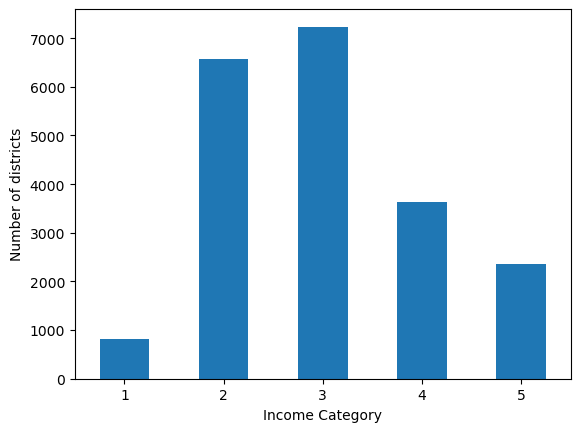

In [53]:
Housing["Income_Category"].value_counts().sort_index().plot.bar(rot=0, grid=False)
plt.xlabel("Income Category")
plt.ylabel("Number of districts")
plt.show()

We have done so as to use stratified sampling coz we don't want sampling bias.

In [55]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10 ,test_size=0.2 ,random_state=42)
strat_splits = []
for train_index ,test_index in splitter.split(Housing ,Housing["Income_Category"]):
    strat_train_set_n = Housing.iloc[train_index]
    strat_test_set_n = Housing.iloc[test_index]
    strat_splits.append([strat_train_set_n ,strat_test_set_n])

strat_train_set , strat_test_set = strat_splits[0]

if we want only one test set we can use the stratify argument of train_test_split function.

In [56]:
strat_train_set , strat_test_set = train_test_split(Housing ,test_size=0.2, stratify=Housing["Income_Category"], random_state=42)

since we will not need the Income_Category column again we can drop it.

In [57]:
for set_ in (strat_train_set , strat_test_set):
    set_.drop("Income_Category" ,axis=1 , inplace=True)

thus we have successfully created both training and test set.